# Assignment 7: Matplotlib

## Learning Objectives
This lesson meets the following learning objectives:
- The ability to visualize data using Matplotlib

## Instructions
Read through all of the text in this page. This assignment provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  Section headers with icons have special meanings:  

- <i class="fas fa-puzzle-piece"></i> The puzzle icon indicates that the section provides a practice exercise that must be completed.  Follow the instructions for the exercise and do what it asks.  Exercises must be turned in for credit.
- <i class="fa fa-cogs"></i> The cogs icon indicates that the section provides a task to perform.  Follow the instructions to complete the task.  Tasks are not turned in for credit but must be completed to continue progress.

Review the list of items in the **Expected Outcomes** section to check that you feel comfortable with the material you just learned. If you do not, then take some time to re-review that material again. If after re-review you are not comfortable, do not feel confident or do not understand the material, please ask questions on Slack to help.

Follow the instructions in the **What to turn in** section to turn in the exercises of the assginment for course credit.

## Background

**What is `Matplotlib`?**

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

`Matplotlib` will be our introduction to the world of displaying data in Python. 

### Package Overview

**What tools, objects or functions does this package provide?**

The hierarchy of objects and functions is not as simple or as delinated as we observed in `numpy` or `pandas`, but we get a few major objects from `matplotlib`.

+ `Figure`
+ `Axes`
+ `Artist` 

We will almost entirely concern ourselves with the `Figure` and `Axes` objects.

### Other Learning Resources

+ [DataCamp Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
+ [Official User's Guide](https://matplotlib.org/users/index.html)

## Coding Styles

There are two ways to write your code using the matplotlib library. These are referred to as:
- the Pyplot API approach
- the object-oriented API approach.

In this tutorial we will teach the object-oriented API approach. You will often find online documentation using the Pyplot approach. The Pyplot approach may be easier to work with initially, but the object-oriented approach is more flexible. In fact, the documenation states:

> the pyplot API is generally less-flexible than the object-oriented API.

## <i class="fa fa-cogs"></i> Notebook Setup

As before, we import any needed packages at the top of our notebook. This time we will import `numpy`, `pandas` and `matplotlib`.

The first thing you will notice is that our style of importing for `matplotlib` is a little different. Unlike other packages, we import `matplotlib.pyplot` instead of just `matplotlib`.  We will refer to this library as simply `Pyplot`. Therefore, function calls are from the `Pyplot` library. The documentation notes the following:

>`Pyplot` provides the state-machine interface to the underlying object-oriented plotting library. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot. 

When working interactively in a jupyter notebook we need to use `magic` command that will instruct the Jupyter instance to display `matplotlib` plots inline. In this case, we will use the `%matplotlib inline` instruction.

Let's get started by importing the required libraries and setting the magic for inline plots.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

The iris dataframe that we used in the Pandas tutorials will serve as our demo data to plot, load that here:

In [3]:
df = pd.read_csv('data/iris.csv')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Required Data Types

All of the plotting functions provided by `Pyplot` expect Numpy arrays as input. If your data is in Pandas series or data frames it is best to convert them first to Numpy arrays before you plot.  Recall that we can convert any column of a data frame to a Numpy array. Each column is a `pd.Series` which we can get from the `DataFrame` by its label, and then convert the series to a `np.array` using the `values` property or the `to_array()` function.  For example, the following code demonstrates that the `.values` property of a column from our iris data is a Numpy array:

In [4]:
type(df['sepal_length'].values)

numpy.ndarray

## 1. The `Figure`

To get started, examine and execute the code below. It creates a scatterplot of the `sepal_length` vs `sepal_width` from the iris dataset. The code performs three tasks (we will explain these in more detail later):
- It creates a new figure object
- Adds an axes to the figure as part of a "subplot" arrangement.
- Plots a scatterplot between two Numpy arrays of data:


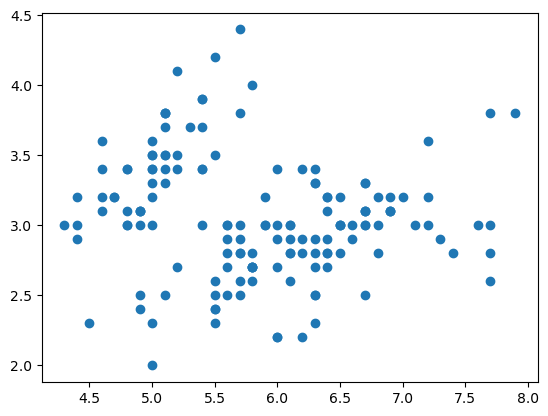

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['sepal_length'].values, df['sepal_width'].values)

Alternatively, the plot above can also be generated in one line:

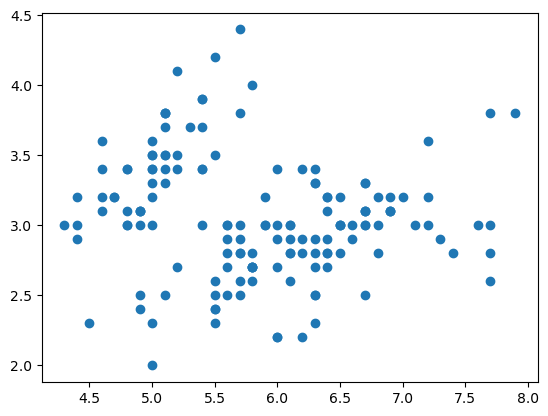

In [6]:
plt.scatter(df['sepal_length'].values, df['sepal_width'].values);

While the second form is useful for simple plots, it can become unwieldy for more complex plots. Therefore, for both clarity, and to understand `matplotlib` we will use the more explicit form.  This approach should help in avoiding some pitfalls and confusion.  

## 1.1 Parts of a Figure

The following figure provided by the [Matplotlib documentation](https://matplotlib.org/2.1.2/tutorials/introductory/usage.html) indicates the location and the names of elements used by this package for the plots it produces. Take a moment to explore the labels on the figure.

![Parts of a figure](./media/A07-anatomy.png)

> The [Pyplot] figure [object] keeps track of all the child axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of axes, but to be useful should have at least one.

### 1.2 Creating a Figure
To create a figure we must first call the `plt.figure()` function. As shown in the code below we assing our new figure to a variable named `fig`:

In [7]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Observe that the fig is a default 'empty' figure of size 432x288 pixels with no axes.  A figure created in this way will be empty.


### 1.3 Subplots (a.k.a. Axes)

A figure created with matplotlib can have multiple axes objects. Consider the image below, it contains 4 subplots (i.e. four different axes objects) arranged in a 2x2 grid:

![subplots](./media/A07-sphx_glr_usage_002.png)

To add an `axes` to the figure (named `fig`) we can call a method named `add_axes()`.  If you [read the documenation](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes) of that function you will find that it takes four arguments. However, there is a convenience function named `add_subplot()` that makes it easier to add an axis and we will use that instead. You will notice as you learn more about plotting libraries that having convenience functions is common. By using them, we avoid calling a 'lower-level' function. The 'higher-level' convenience function then calls the low-level functions with reasonable defaults.


The [add_subplot documentation](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) indicates that that `add_subplot` can be called in multple ways:

```
add_subplot(nrows, ncols, index, **kwargs)
add_subplot(pos, **kwargs)
add_subplot(ax)
```

We will use the first form in this tutorial:

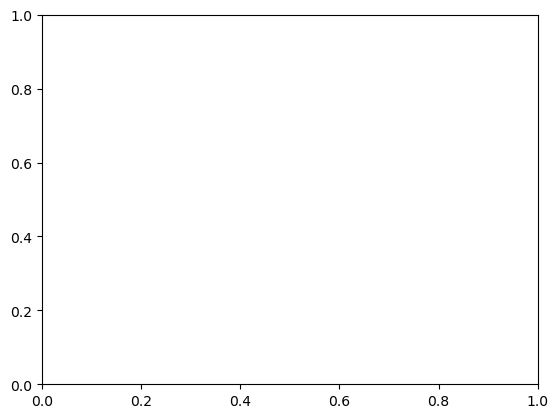

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

The code above provides 1's to the `nrows`, `ncols` and `index` arguments.  This means that our grid is a 1 x 1 grid. The 3rd argument, the `index`, indicates which "cell" the axes will be drawn in. Since we only have one "cell" this argument is 1.

### 1.4 Plotting

Now that we have indicated the plots and added axes, we want to add a plot.  To demonstrate this we will add a scatterplot using data from the iris dataset.  To add points we call the `scatter()` method from the `axes` object we created.  This draws the given points to the `ax` object.

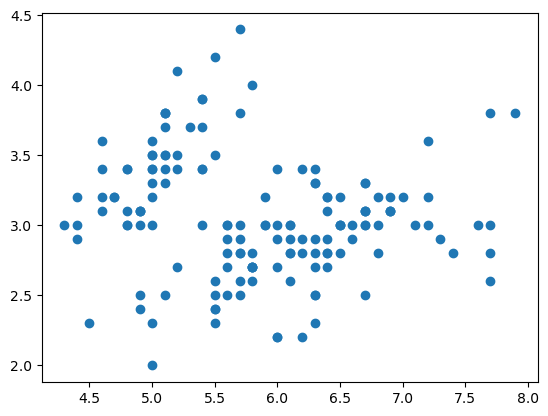

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['sepal_length'], df['sepal_width'])

Notice at the top of the figure is text similar to `<matplotlib.collections.PathCollection at 0x7fcd440985f8>`. This is a side effect of not explicitly "drawing" the figure but letting the notebook "print" the last object. We can exclude this text by calling the `plt.show` function.

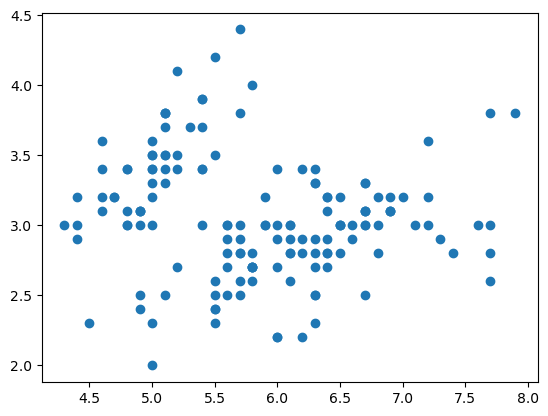

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['sepal_length'], df['sepal_width'])
plt.show()

### 1.5 Setting axes and plot titles
We can add titles to both our axes and to the entire plot using these functions:
- For axes:
  - `set_xlabel`
  - `set_ylabel`
- For the figure:
  - `suptitle`
- For a subplot (axes):
  - `set_title`

As an example, let's add titles to the axes of the iris plot from the previous section:

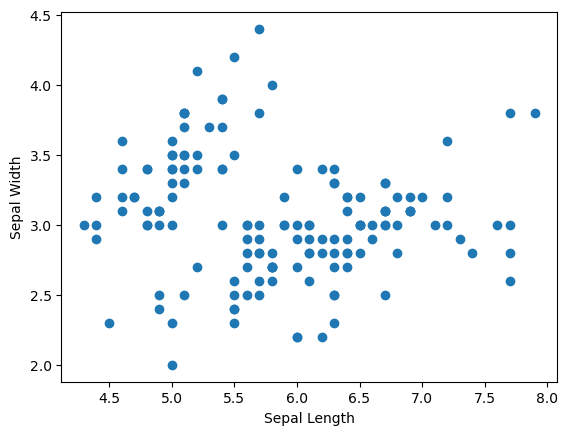

In [11]:
# Create the scatterplot 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['sepal_length'], df['sepal_width'])

# Add axes titles
ax.axes.set_xlabel('Sepal Length')
ax.axes.set_ylabel('Sepal Width')

# Show the plot with labels
plt.show()

Now let's add a title to our figure:

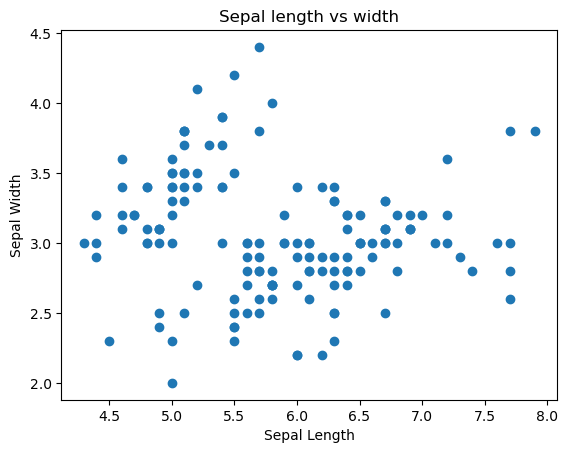

In [12]:
# Create the scatterplot 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['sepal_length'], df['sepal_width'])

# Add axes titles
ax.axes.set_xlabel('Sepal Length')
ax.axes.set_ylabel('Sepal Width')

# Add a figure title
ax.set_title('Sepal length vs width')

# Show the plot with labels
plt.show()

The `set_suptitle` is used to set a title to the figure when more than one subplot (axes) is present. We will see this function used in section 4 below.

#### 1.6. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Create the a scatter plot using the iris data, but compare `petal_width` to `petal_length`.  Be sure to add labels to the axes.


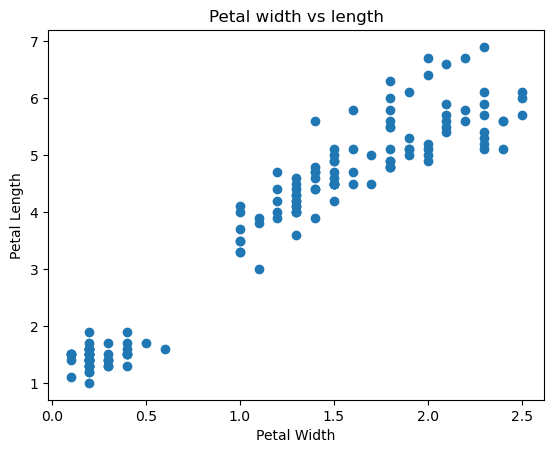

In [13]:
f = plt.figure()
a = f.add_subplot(1, 1, 1)
a.scatter(df['petal_width'], df['petal_length'])

# Axis labels
a.axes.set_xlabel('Petal Width')
a.axes.set_ylabel('Petal Length')

# Title
a.set_title('Petal width vs length')

# Shows plot
plt.show()

## 2. `Matplotlib` Tour

The [pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) provides a tour of `matplotlib` features, but it uses the `pyplot API` coding style.  In this section we show the same tour but using the object approach we've started above.

### 2.1 `plot()` basics

The [plot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) draws lines and markers using a set of x and y coordinates.  Similar to the `add_subplot` function, there are multiple ways to call `plot()`.  The call signatures for `ax.plot()` are:

```python
plot([x], y, [fmt], data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

The first argument `x` should be an array of value. If it is a 1D array then the argument `y` must also be provided. If it is a 2D array then only `x` need be provided.  The `fmt` argument provides a "code" for the formatting of the data dispay. For example a value of `bo` would indicate that circles should be drawn in blue color. You can fine a complete list of formatting options in the **Notes** section of the [plot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) documentation.  Take a moment to review these.

There are a large number of arguments that you can use to customize the plot. Take a moment to look at the **Other Parameters:** section of the [plot function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) documentation.

As described in documentation, these different calls allow for succinct calls to create plots:

```python
# Plot x and y using default line style and color.
plot(x, y)        

# Plot x and y using blue circle markers.
plot(x, y, 'bo')  

# Plot y using x as index array 0..N-1.
plot(y)           

# Ditto, but with red plusses.
plot(y, 'r+')     
```

There are two styles for formatting the plot. The first method is to use the `fmt` argument. The second is to use explicit arguments. For example, compare these two calls to `plot()`.  They produce identical results.

```python
plot(x, y, 'go--', linewidth=2, markersize=12)
plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)
```

The more explicit versions are more readable, easily modified and converted to functions, but can take longer to write.  

Below, a very simple call to `plot()` is demonstrated.  For this plot we draw a sequence of numbers: 1, 2, 3 and 4.  

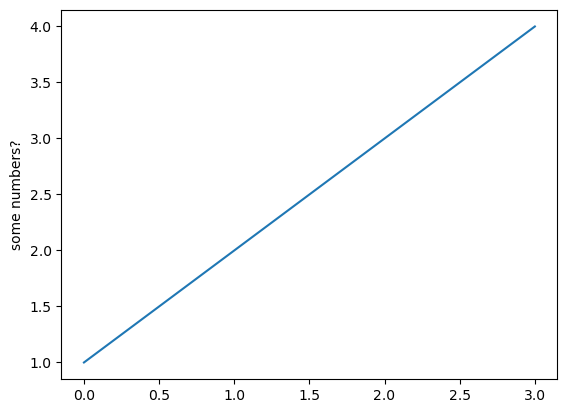

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4])
ax.axes.set_ylabel('some numbers?')
plt.show()

`plot()` is a versatile command. Observe that we only gave one argument to the `plot()` function in the code above: the x-dimension. An automatic index is generated for the y-dimension: `[0, 1, 2, 3]`.

We can provide an (optional) set of y values to be used as indexes.

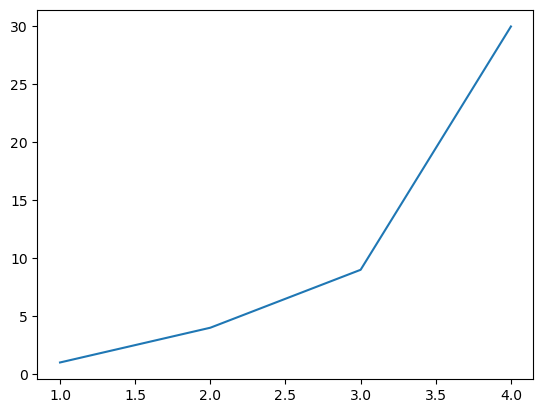

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4], [1, 4, 9, 30])
plt.show()

### 2.2 Style Basics

Using `plot()`, we can also declare the style the points should be drawn. Below the call to `ax.plot()` is provided the argument`'ro'`. The change observed is instead of a blue line, we have red circles.  

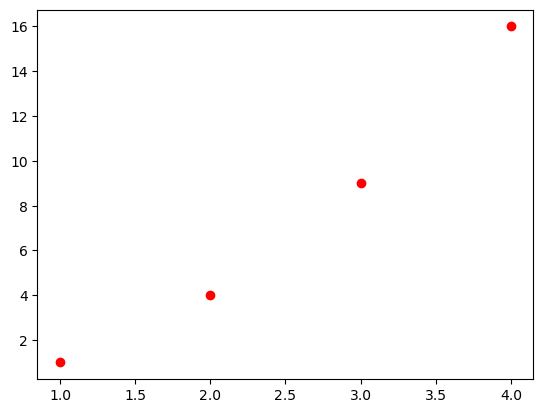

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.show()

What do you suppose `'ro'` implies?  Take a look in the "Notes" section of the [plot documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to verify. 

Next we will plot multiple lines on the same plot.  To do this, let's create a list of numbers representing time, starting at 0 and ending at 5 seconds with an interval of every 0.2 seconds. 

In [17]:
t = np.arange(0., 5., 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

To plot multiple lines, the call to `plot` can be expanded by providing multiple sets of x and y coordinates and respective formatting.  To demonstrate, we'll provide our array `t` as the x-axis and we'll re-use the `t` for three different y-axis coordinates: t, t^2 and t^3.

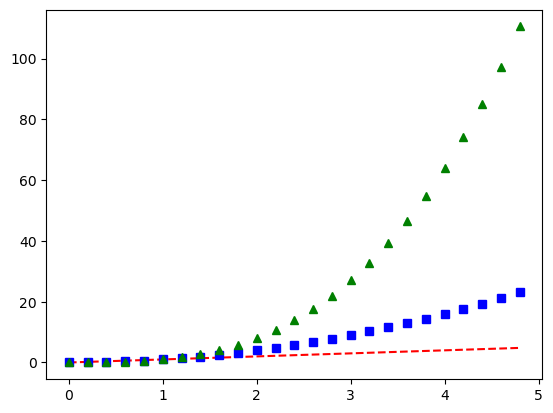

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Observe in the call to `plot` above that the three sets of x and y coordinates are provide one after the other.

### 2.3 Plotting with dictionary labels

Remember from the introdcution above it was recommended to convert your data into Numpy for plotting.  There are some exceptions, however, such as Python dictionaries, [Numpy recarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.recarray.html) (which we have not discussed) or Pandas dataframes can be used for plotting.  In such cases, you can use the keys (for dictionaries and Numpy recarray) or column labels (Pandas dataframes) to refer to data.  This reduces the need to convert your data to Numpy arrays.  

**Note:** If Pandas data frames or dictionaries are not explicitly supported by a function, then default to using Numpy arrays.


First let's generate some random data and store it in a Python dictionary.  The dictionary will consits of four Numpy arrays with the following keys:
- "a": the x-coordiantes
- "b": the y-coordinates
- "c": the colors for the points
- "d": the sizes for the points

In [19]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'c': array([49, 32, 32,  8,  0,  5, 12, 35, 20, 45, 49, 32, 47, 37,  6, 30, 23,
        32,  1, 25, 48, 46, 28, 49,  0, 14, 11, 11, 30, 35, 23,  0, 23,  0,
        35, 38, 48, 41, 42, 32,  8,  8, 22,  2, 15, 11, 39, 33,  0, 21]),
 'd': array([ 85.96020624,  75.60332842, 139.49528122,  45.56225866,
        154.7726785 ,  16.55256793,   6.89550852, 261.4015119 ,
         35.09127166,  27.70974674, 188.97457474, 260.95969178,
         38.44144792,   8.82131094,   6.8004386 , 143.46028423,
        104.5852373 , 205.23015059,  87.20048238,  68.1024563 ,
        252.05601302,  43.38677085, 115.7514867 , 113.50395192,
         16.69660345,   2.27112187, 123.871374  ,  24.20912693,
         24.40315328,  17.83555605,  12.88550712,  42.05769285,
        101.44285859,

Now let's plot it. We can use the keys of the dictionary (e.g. "a", "b" or "c") to refer to the arrays we want for the x and y coordinates as well as for sizes of points! Here, we'll use `scatter()` to draw a scatterplot rather than `plot()`.

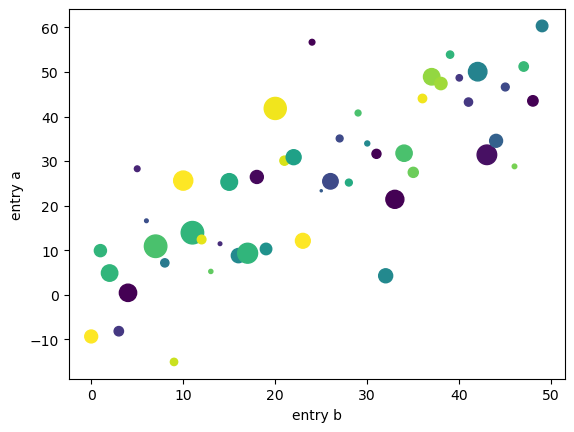

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.axes.set_ylabel('entry a')
ax.axes.set_xlabel('entry b')
plt.show()

Note in the call to `scatter` above, we provided the dictionary (named `data`) as the `data` argument, and we gave the key names "a" and "b" as references for the x and y coordinate data.  What do you think the `c` and `s` arguments are for?

### 2.4 Colors

In the previous section we provided a set of numbers as colors for the points in the scatterplot.  There are a variety of methods for specifying colors to matplotlib and we leave this to you to explore as needed. The most simple way to provide colors is using the color abbreviations we learned when we examined the `plot` function. To learn more about colors, the [color demo](https://matplotlib.org/gallery/color/color_demo.html)  provides an introduction to the variety of ways in which colors can be provided.

### 2.5. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Create a scatter plot using the iris data frame. Do not convert the data frame columns to numpy arrays. Rather use the dataframe as is. Be sure to:
- plot `petal_length` vs `petal_width`.
- Use column names to specify the x and y coordinates (don't pass in Numpy arrays)
- Color each dot by the species (you'll need to be creative to do this).
  - Hint 1: use the [pd.Series.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) function to convert species names to colors). 
  - Hint 2: Use the color abbreviations we learned for the the plot function (e.g. 'r', 'b', 'g', etc.).
- Add axis labels

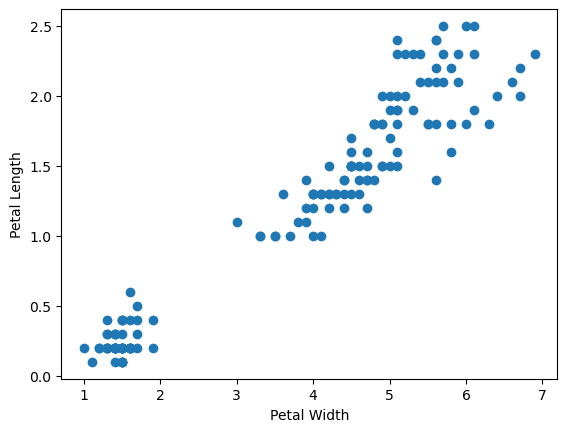

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter('petal_length', 'petal_width', data=df)
ax.axes.set_ylabel('Petal Length')
ax.axes.set_xlabel('Petal Width')
plt.show()

## 3. Categorical (`string`) Plotting

We can pass categorical data stored as strings to many plotting functions.  To demonstrate this, let's first, create some simple data to plot:

In [22]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

Now, let's use that data to make three different plots: a bar graph, scatterplot and line chart.  

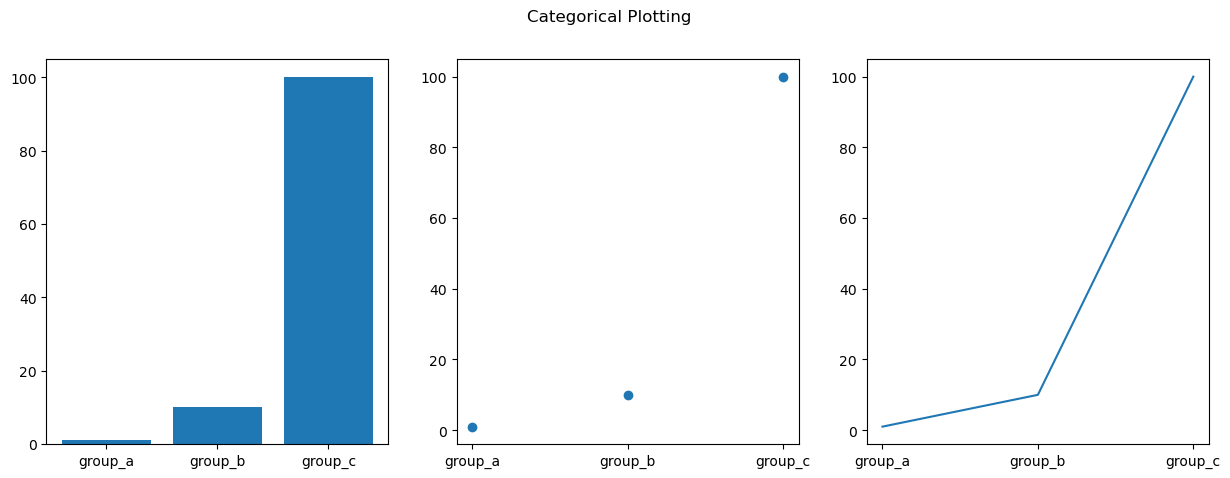

In [23]:
# Create a figure object.
fig = plt.figure(figsize=(15, 5))

# Add three subplot axes to the figure.
ax1 = fig.add_subplot(1, 3, 1)

ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Add a bargraph, scatterplot and line plot to each
# axes respectively.
ax1.bar(names, values)
ax2.scatter(names, values)
ax3.plot(names, values)

# Add a title to the figure.
fig.suptitle('Categorical Plotting')

# Cleanly show the plot.
plt.show()

Notice that the categories are provided as what would normally be the x-axis numerical values. The x-axis labels are automatically set as the category names.

#### 3.1. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Create a bar graph that indicates the mean sepal_height of each subspecies.


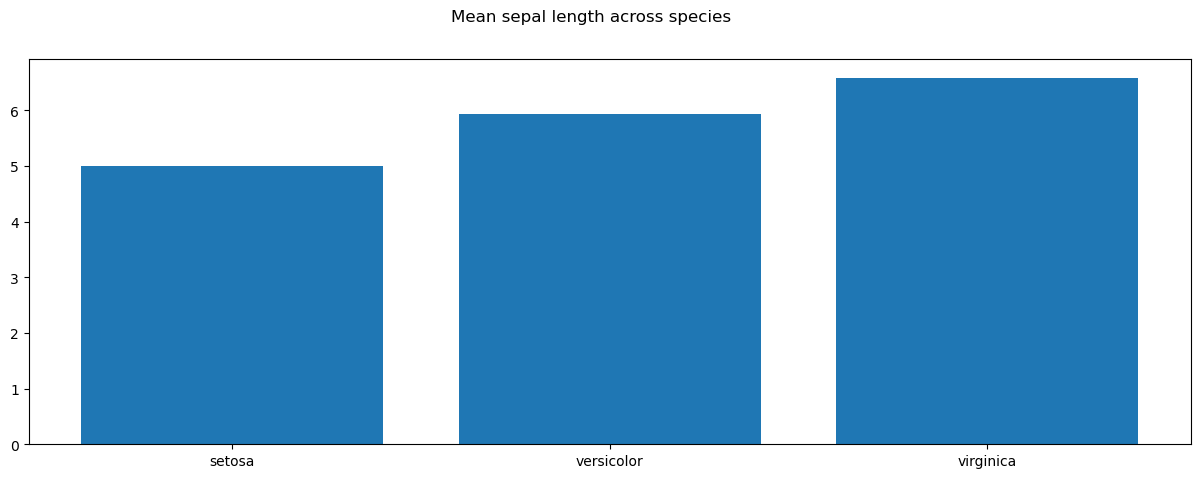

In [24]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.bar(df['species'].unique(), df.groupby('species').mean()['sepal_length'])

fig.suptitle('Mean sepal length across species')

plt.show()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 4. Intermission -- Coding Sytle

Now is perhaps a good time to see an example for the difference between the Pyplot API and the object-oriented. The following code is from the `pyplot API` tutorial and generates a plot identical to that shown in the previous section. It generates a figure with 1x3 subplots containing a bar graph, scatterplot and line chart respectively:

```python
plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()
```

Notice that the `plt` library is used as a prefix for all functions.  This is possible because matplotlib's Pyplot API is a "state-machine". You may remember this term from the "Getting Started" section above.  One way to conceptualize plotting using the Pylot API is to imagine an invisible figure that is "hidden" until you plot it.  Any function call using the Pylot API acts on that invisible figure.  This is why some examples can skip right to setting axes without even creating a figure! But it requires that we do things in a particular order. Notice that an axes is created then plotted on, then the next axes, and so forth. In comparison, with the object-oriented approach we can apply functions to any object at any time we want, and in the end becomes less confusing, and there is less for our brains to keep track of, especially if we are working on more than one figure at at time.

## 5. Multiple Axes

In section 4 we saw an example of a figure with more than one subplot (axes).  Here we will provide more details. Often we will want to have related plots in one figure. Let's use some data and function found in the official tutorial.  First let's create two Numpy arrays containing a range of numbers.

In [25]:
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

Next, let's create a function that will recieve a value and adjusts it by using various Numpy functions and values: `np.exp()`, `np.cos()` and `np.pi`.

In [26]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

Let's use these data to plot a figure with 2 rows and 1 column of plots using the data we just created. To do this we call the `add_subplot` function two times. Both times we must specify the same `nrows` and `ncols` arguments. But, the third argument, the `index`, we increment for each subplot:

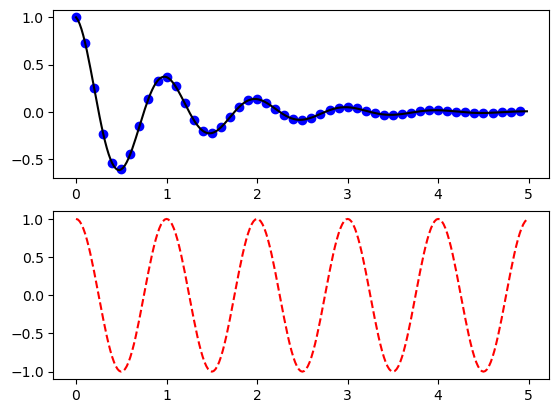

In [27]:
# Create a figure object
fig = plt.figure()

# Create the two axes (subplots)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Plot the t1 data as the x-coordinates and use the f() function
# to calculate the y-cooordinates.
ax1.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# For the second plot, provide the t2 data as the x-coordinates and
# calcalute new y-coorindate values.
ax2.plot(t2, np.cos(2*np.pi*t2), 'r--')

# Show a clean plot
plt.show()

Take a moment to ensure that you understand every function call, argument and object used in the code above.  Ask a question if you are unsure of anything.

### 5.1 Using the `subplots` function

*Note the plural form!*

We can create an identical figure as shown above using the [subplots function](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots). This is a convenience function that allows us to create all of the axes in one function call. For example, suppose we want to create a 2x2 figure:

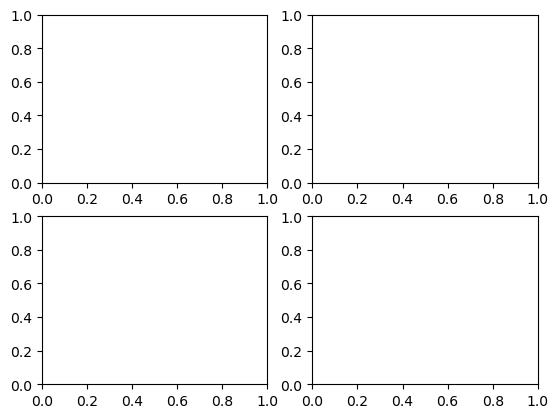

In [28]:
fig = plt.figure()
axes = fig.subplots(2, 2)

An empty 2 by 2 figure appears. We can examine the `axes` object and see what `type` of object it is:

In [29]:
type(axes)

numpy.ndarray

A `numpy` array of axes is given. We can then use the `numpy` attribute and accessors with this axes list. For example to get the shape:

In [30]:
axes.shape

(2, 2)

And to access a given axis, such as in the upper-right corner:

In [31]:
axes[0,1]

<AxesSubplot:>

Now, let's plot some data in the upper-left corner.  We can do this by accessing the corresponding axes object in the `axes` Numpy array (which is a 2x2 array).  The upper left-corner is indexed as `axes[0, 0]`: 

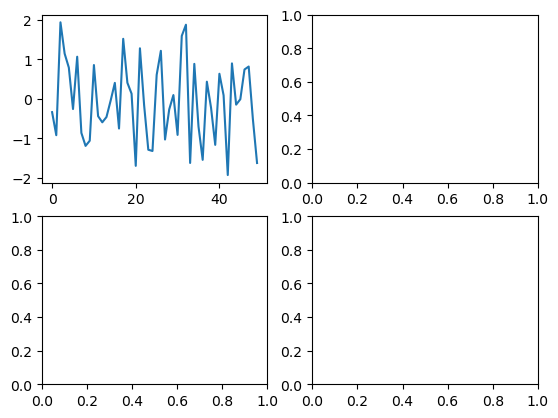

In [32]:
# Generate some random data to plot
x = np.random.randn(50)

# Plot the data in the first subplot cell:
fig = plt.figure()
axes = fig.subplots(2, 2)
axes[0, 0].plot(x)
plt.show()

Just like with any typical Python library, there are shortcuts.  We can bypass the step of first creating a `figure` object by allowing the `subplots` to do it for us. Here we use the Pyplot API to retreive the fig and axes objects all in one step.

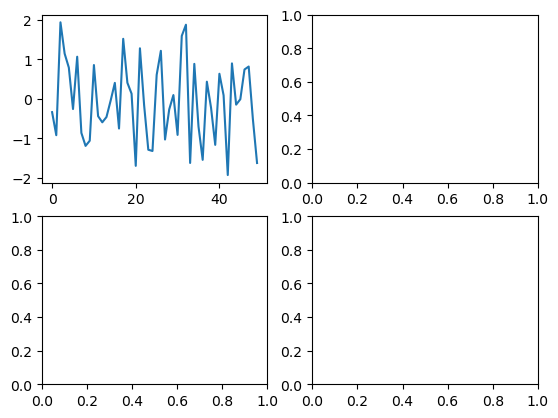

In [33]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x)
plt.show()

### 5.2. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.


Create 4 scatterplots for the iris data all in one figure. The figure should include scatterplots of these comparisions:
- `sepal_length` x `petal_length`
- `sepal_length` x `petal_width`
- `sepal_width` x `petal_length`
- `sepal_width` x `petal_width`

Be sure that:
- the points for the species 
- the axes for each plot are labeled
- the figure has a label.

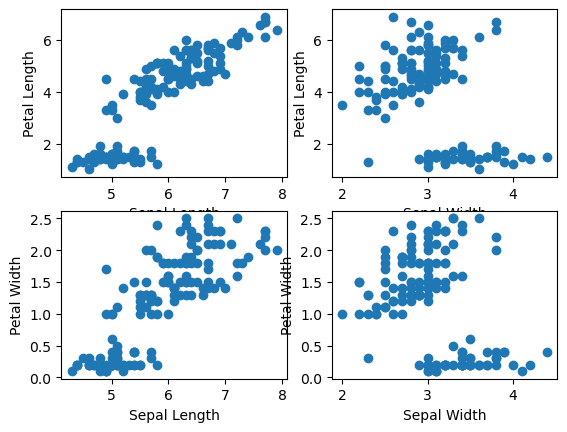

In [40]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter('sepal_length', 'petal_length', data=df)
axes[0, 0].axes.set_ylabel('Petal Length')
axes[0, 0].axes.set_xlabel('Sepal Length')
axes[0, 1].scatter('sepal_width', 'petal_length', data=df)
axes[0, 1].axes.set_ylabel('Petal Length')
axes[0, 1].axes.set_xlabel('Sepal Width')

axes[1, 0].scatter('sepal_length', 'petal_width', data=df)
axes[1, 0].axes.set_ylabel('Petal Width')
axes[1, 0].axes.set_xlabel('Sepal Length')
axes[1, 1].scatter('sepal_width', 'petal_width', data=df)
axes[1, 1].axes.set_ylabel('Petal Width')
axes[1, 1].axes.set_xlabel('Sepal Width')

plt.show()

## 6. Non-Linear Axes

Often, we need logarithmic values and other non-linear orderings for our plot axes.  We can do this using the `set_yscale` and `set_xscale` functions. To demonstrate this, let's first create some data:

In [41]:
# Fix the random seed so we can reproduce the same random numbers every time.
np.random.seed(19680801)

# Create some random x and y-coordinate data between the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

Now let's make four different plots of the same data but using different y scales: linear, log, symlog, and logit:

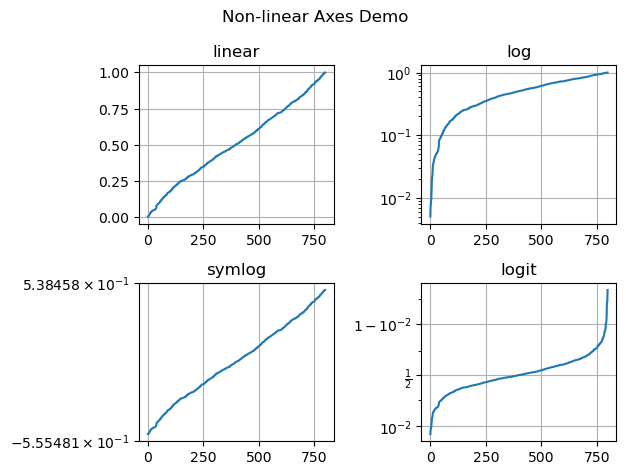

In [42]:
# Create the figure and a 2x2 grid of axes.
fig, axes = plt.subplots(2, 2)

# Plot data to those axes.
axes[0, 0].plot(x, y)
axes[0, 1].plot(x, y)
axes[1, 0].plot(x, y - y.mean())
axes[1, 1].plot(x, y)

# Set (change default) scales, and enable a grid, for each axes.
axes[0, 0].set_yscale('linear')
axes[0, 0].set_title('linear')
axes[0, 0].grid(True)

axes[0, 1].set_yscale('log')
axes[0, 1].set_title('log')
axes[0, 1].grid(True)

axes[1, 0].set_yscale('symlog')
axes[1, 0].set_title('symlog')
axes[1, 0].grid(True)

axes[1, 1].set_yscale('logit')
axes[1, 1].set_title('logit')
axes[1, 1].grid(True)

# Add a title for the full figure.
fig.suptitle('Non-linear Axes Demo')

# Nice automatic spacing.
plt.tight_layout()  

# Show the plot.
plt.show()

Explore the function calls, objects and arugments of the code above. Do you understand it all?  If not, consult the online documentation or ask a question.

## 7. Saving your Figures
Once your plot is to your liking you can easily save your plots using the `plt.savefig` command. For example:


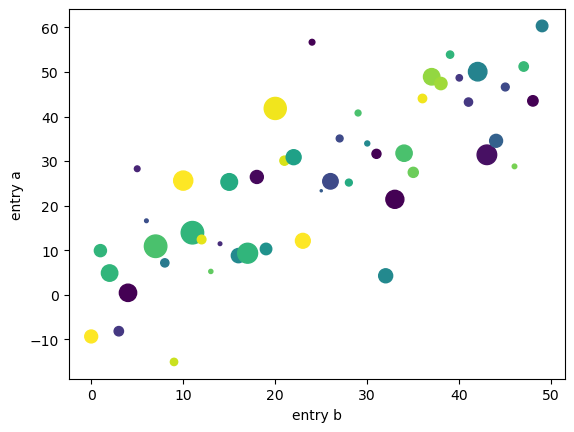

<Figure size 640x480 with 0 Axes>

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.axes.set_ylabel('entry a')
ax.axes.set_xlabel('entry b')
plt.show()
plt.savefig("figure7.png", format="png", dpi=72)

Observe the arguments. First is the path and file name for the image.  The `format` argument specifies the image format which can include the following types: `png`, `pdf`, `ps`, `eps` and `svg`. Finally, is the `dpi` or "dots per inch".  Most journals expect that images are generated in at least 300 dpi for publication, but increasing the dpi increases the size of your image.  Therefore, for testing and sharing of images use a smaller dpi like 72, for publication use a dpi of 300 or greater.  You can learn more about the `savefig` function at the [online documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

## Expected Outcomes
At this point, you should feel comfortable with the following:
- Using the Figure object 
- The parts of a Matplotlib figure
- Styling a figure
- Categorical plotting
- Plots with multiple axes
- Non-linear axes.

## What to Turn in?
Be sure to **commit** and **push** your changes to this notebook.  All practice exercises should be completed.  Once completed, send a **Slack message** to the instructor indicating you have completed this assignment. The instructor will verify all work is completed. 